In [139]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

from graph_tool.all import *
import numpy as np
import matplotlib.pyplot as plt

from scripts.generate_network import barabasi_albert
from scripts.random_attacks import *
from scripts import visualization as viz

viz.load_matplotlib()
plt = viz.plt
plt.style.use('seaborn-poster')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%%time
g = barabasi_albert(1000)

CPU times: user 734 µs, sys: 568 µs, total: 1.3 ms
Wall time: 3.17 ms


In [23]:
plt.switch_backend("cairo")
fig, ax = plt.subplots(figsize=(10, 10))
plt.axis('off')
pos = arf_layout(g)

deg = g.degree_property_map("total")
deg.a = 4 * (np.sqrt(deg.a) * 0.5 + 0.4)

graph_draw(g, pos=pos, vertex_size=deg, output="ba_test.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd4567b72b0, at 0x7fd3cc0985e0>

In [140]:
ps = np.linspace(0, 1, 40)

N = 10000
k = 4
p_er = k / N
m = k / 2
ntimes = 5
type = 'edge'

mean_sizes_ba, std_sizes_ba = simulate_attack_barabasi_albert(N, ps, m=m, ntimes=ntimes, type=type)
mean_sizes_er, std_sizes_er = simulate_attack_erdos_renyi(N, p_er, ps, ntimes=ntimes, type=type)

100%|██████████| 40/40 [00:09<00:00,  4.07it/s]


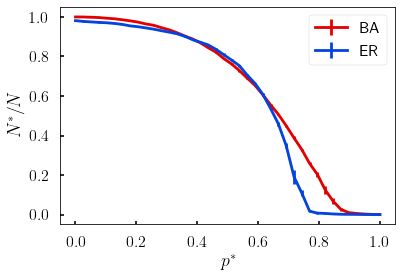

In [141]:
%matplotlib inline
plt.errorbar(ps, mean_sizes_ba, yerr=std_sizes_ba, fmt='-', label='BA', color='xkcd:red')
plt.errorbar(ps, mean_sizes_er, yerr=std_sizes_er, fmt='-', label='ER', color='xkcd:blue')


plt.ylim(-0.05, 1.05)
plt.ylabel('$N^*/N$', fontsize=18)
plt.xlabel('$p^*$', fontsize=18)
plt.legend()
plt.show()

In [142]:
ps = np.linspace(0, 1, 50)

N = 10000
k = 4
p_er = k / N
m = k / 2
ntimes = 5

mean_sizes_ba, std_sizes_ba = simulate_attack_barabasi_albert(N, ps, m=m, random_attack=False, ntimes=ntimes)
mean_sizes_er, std_sizes_er = simulate_attack_erdos_renyi(N, p_er, ps, random_attack=False, ntimes=ntimes)

100%|██████████| 50/50 [01:09<00:00,  1.39s/it]


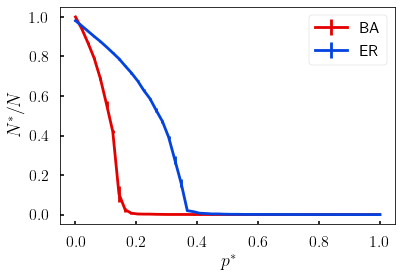

In [143]:
%matplotlib inline
plt.errorbar(ps, mean_sizes_ba, yerr=std_sizes_ba, fmt='-', label='BA', color='xkcd:red')
plt.errorbar(ps, mean_sizes_er, yerr=std_sizes_er, fmt='-', label='ER', color='xkcd:blue')

plt.ylim(-0.05, 1.05)
plt.ylabel('$N^*/N$', fontsize=18)
plt.xlabel('$p^*$', fontsize=18)
plt.legend()
plt.show()